In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "darkgrid")
#plt.style.use("dark_background")

In [5]:
athlete_events = pd.read_csv('athlete_events.csv', encoding='utf8')
athlete_events.head(10) #let's have a look

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [6]:
print(
    athlete_events.Year.min(), 
    athlete_events.Year.max()
)

1896 2016


### 1. Exploratory data analysis

In [3]:
athlete_events.shape, athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271106 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39785 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


((271116, 15), None)

In [4]:
athlete_events.isnull().sum() #how many values are missed in each column

ID             0
Name           0
Sex           10
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231331
dtype: int64

- At the first look, 'Age' column has unusual format, as interval data type. For this type of data it's integer expected, but it's float. There are gaps in data, so that's why pandas displays it as float.

- Also, there are gaps in 'Sex', 'Height' and 'Weight' columns. Fortunately, this data fields have no direct dependency between each other and all of those will be analysed separately, so gaps will be ignored.

In [5]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.557193,175.338970,70.702393,1978.378480
std,39022.286345,6.397129,10.518462,14.348020,29.877632
min,1.000000,6.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,100.000000,226.000000,214.000000,2016.000000


- Describing the numerical data we can see 6 and 100 years old youngest and oldest athletes. Let's check truthfulness by simple googling, and we can see that the youngest and oldest athletes are 10 and 72 y.o.

- Checking the same way min and max values for 'Height' and 'Weight' fields we can see that tallest, shortest athletes are 2.47cm, 1.36cm. The heaviest and lightest are 218kg, 31kg.

- Considering that, we can admit that this dataset has mistakes and outliers. There is no dependence between that values, so answering questions about each of them, we will clean empty values. To avoid significant results distortion, we can use data inside 95% percentiles.

##### I have checked columns with string data simply using set() method for each column and looking at list values. There are problems with two: 'Name' and 'City'.

In [9]:
# checking the string data
set(athlete_events.Name)

{'Petro Paxnyuk',
 'Dieter Notz',
 'Vasile J. Ti',
 'Giorgio Chiavacci',
 'Peter Steele "Pete" Blair',
 'Aurel Drgan',
 'Branko Belai',
 'Kristan Lee Bromley',
 'Kaylynn Hick',
 'Franois Ombanzi',
 'Wu Yanan',
 'Erich Schmidt',
 'Shelayna Elicia  Oskan-Clarke (Gumbs-)',
 'Diego Allona Marenzi',
 'Hermann Joseph Barrelet',
 'Karl Graf',
 'ngeles Barreiro Rico',
 'Fahmi Falih',
 'Oscar Kristian Bergstrm',
 'Sandi Morris',
 'Ekke Ozlberger',
 'Michael "Mike" McLeneghan',
 'Mara Itziar Esparza Pallars',
 'Jzsef Gl',
 'Otakar Rademacher',
 'Leonid Davydovich Gissen',
 'Abdul Haji Abdul Latheef',
 'Stephen John McGlede',
 'Lszl Decker',
 'Carlos Gngora Mercado',
 'Mohammed Benkablia',
 'Milan Mavan',
 'Oana Manuela Muunoi-Pantelimon',
 'Jerzy Krawczyk',
 'Fabin Vzquez Lpez',
 'Ren Suetovius',
 'Petra Nows',
 'Monique van der Lee',
 'Vladimir Vladimirovich Lobanov',
 'Philippe Cabut',
 'Mojisola Oluwa',
 'Milan rejber',
 'Yumari Gonzlez Valdinieso',
 'Kayrat Biekenov',
 'Arthur Ringland Harri

In [10]:
set(athlete_events.City)

{'Albertville',
 'Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Calgary',
 'Chamonix',
 "Cortina d'Ampezzo",
 'Garmisch-Partenkirchen',
 'Grenoble',
 'Helsinki',
 'Innsbruck',
 'Lake Placid',
 'Lillehammer',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Nagano',
 'Oslo',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Salt Lake City',
 'Sankt Moritz',
 'Sapporo',
 'Sarajevo',
 'Seoul',
 'Sochi',
 'Squaw Valley',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo',
 'Torino',
 'Vancouver'}

#### Names
##### As we can see, the names include some sort of nicknames (Exp: 'Joseph "Joe" McMenamin') inside the quotes and transcriptions, maiden names (Exp: 'Larysa Semenivna Latynina (Diriy-)') which are inside the brackets. 
##### To make this data more clear, let's write a function which separates string values by the word and delete all elements enclosed inside the special characters (begins with the letter).
 

In [8]:
import re

#clear names function
def names_cleaner(name: str) -> str:
    return ' '.join([c for c in re.findall(r"[\w'\"]+|[,.!?]", name) if c[0].isalpha() == True])


In [9]:
athlete_events['Name'] = athlete_events['Name'].apply(names_cleaner)
set(athlete_events.Name)

{'Sara Caroline Seger',
 'James Ransom',
 'Louis William Maxson',
 'Fumiharu Miyamoto',
 'Shlomi Haimy',
 'Takeshi Horikoshi',
 'Karin Lenzke Susat',
 'Yana Viktorovna Uskova',
 'Victor Teodorescu',
 'Yen Au Li',
 'Deborah Olivera Gyurcsek',
 'Darko Naseski',
 'Simon Gougnard',
 'Yassine Jebbour',
 'Aleksandr Dmitriyevich Averin',
 'Arnold Robertson Churchill',
 'Maryam Yusuf Jamal',
 'Rajaratnam S Selvanayagam',
 'Barbara Blatter',
 'Mihai Naumencu',
 'Elizabeth Thurley Wood',
 'Josephus Maria Melchior Hermens',
 'Herbert Sllner',
 'Simon Agoston',
 'Juho Kinnunen',
 'Daniel Lee Rose',
 'Todd Bertuzzi',
 'Frank L Little',
 'Andrew Clifton Nicholson',
 'Cheon Min Ho',
 "Patricia Galvin de la Tour d'Auvergne",
 'Stig Arne Gunnestad',
 'Arsne Lucchini',
 'Gerrit Willem Tromp',
 'Blandine Lachze',
 'Eduardo Jimnez Meana',
 'Kylie Ledbrook',
 'Antonio Aguilar Chastellain',
 'Franka Ani',
 'Jean Didiace Bmou',
 'Mary Esther Bedford Marran',
 'Arthur Richard Scholes',
 'Jalani Haji Sidek Moh

#### Cities
##### In this case some cities are written with specific(original language) spelling (Exp: 'Moskva', 'Athina'). To make it more standardised, I will use search_cities() function from geonamescache library.

##### To fix issue with cities spelling I had in plan to apply the function below to 'City' column. But doing this, I faced not stopping execution problem.

In [ ]:

"""def cities_fix(city: str) -> str:
    try:
        return geonamescache.GeonamesCache().search_cities(city, case_sensitive=True)[0]['name']
        '''all cities starts with the capital letter, so case_sensitive = True.
        if city is not enlisted, search_cities() function will return empty list 
        and in case of error we must use original value'''
    except:
        return city"""

In [10]:
'''We need to make changes not one by one, but each particular value at the same time. 
I created two lists with original and fixed spelling variants, then made dictionary for map() function'''

original_cities_list = list(set(athlete_events['City']))
original_cities_list

['Moskva',
 'Calgary',
 'Melbourne',
 'Squaw Valley',
 'Vancouver',
 'Grenoble',
 'Oslo',
 "Cortina d'Ampezzo",
 'Barcelona',
 'Sarajevo',
 'Atlanta',
 'Munich',
 'Paris',
 'Beijing',
 'Rio de Janeiro',
 'Sydney',
 'Sapporo',
 'Sankt Moritz',
 'Berlin',
 'Chamonix',
 'St. Louis',
 'Albertville',
 'Lake Placid',
 'Mexico City',
 'Garmisch-Partenkirchen',
 'Roma',
 'Los Angeles',
 'Innsbruck',
 'Lillehammer',
 'Tokyo',
 'Montreal',
 'Amsterdam',
 'Seoul',
 'Athina',
 'Torino',
 'Helsinki',
 'Nagano',
 'Sochi',
 'Antwerpen',
 'Stockholm',
 'Salt Lake City',
 'London']

In [11]:
import geonamescache

def cities_fix_func(cities_list: list) -> list:
    fixed_cities = []
    gc = geonamescache.GeonamesCache()
    for city in cities_list:
        fixed_city = gc.search_cities(city, case_sensitive=True)
        if len(fixed_city) > 0:
            fixed_cities.append(fixed_city[0]['name'])
        else:
            fixed_cities.append(city)
    return fixed_cities


In [12]:
fixed_cities_list = cities_fix_func(original_cities_list)
fixed_cities_list

['Moscow',
 'Calgary',
 'Melbourne',
 'Squaw Valley',
 'Vancouver',
 'Grenoble',
 'Oslo',
 "Cortina d'Ampezzo",
 'Barcelona',
 'Sarajevo',
 'Atlanta',
 'Munich',
 'Paris',
 'Beijing',
 'Rio de Janeiro',
 'Sydney',
 'Sapporo',
 'Sankt Moritz',
 'Berlin',
 'Chamonix',
 'Saint-Louis',
 'Kalemie',
 'Lake Placid',
 'Mexico City',
 'Garmisch-Partenkirchen',
 'Rome',
 'Los Ángeles',
 'Innsbruck',
 'Lillehammer',
 'Tokyo',
 'Montréal',
 'Amsterdam',
 'Seoul',
 'Athens',
 'Turin',
 'Helsinki',
 'Nagano',
 'Sochi',
 'Antwerpen',
 'Stockholm',
 'Salt Lake City',
 'London']

In [13]:
cities_dictionary = dict(zip(original_cities_list, fixed_cities_list))

athlete_events['City'] = athlete_events['City'].map(cities_dictionary)

In [14]:
#replace Medal NaNs with 'Choco'

athlete_events['Medal'] = athlete_events.Medal.fillna('Choco')

### 2. Who's the most success athlete in whole Olympics history?

In [15]:
pd.DataFrame(
    athlete_events.loc[athlete_events.Medal == 'Gold'].groupby('ID').\
        agg({'Name': 'max', 'Medal': 'count'})
).sort_values(by='Medal', ascending=False).head(1)

,Name,Medal
ID,,
94406,Michael Fred Phelps II,23


##### Michael Phelps is the most success Olympian with 23 Golden medals.

### 3. The dynamics of medals distribution by country.

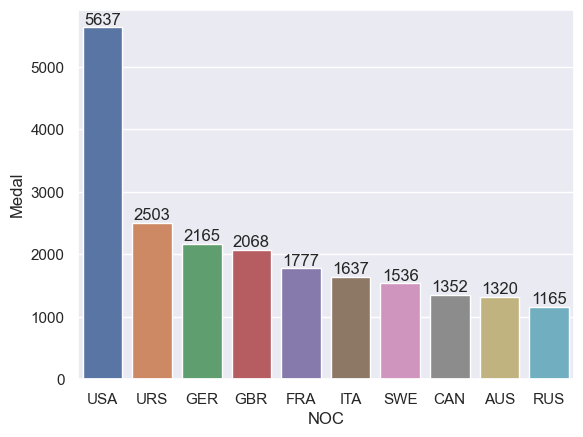

In [16]:
noc_medals_data = pd.DataFrame(
    athlete_events.loc[athlete_events.Medal != 'Choco'].groupby(athlete_events.NOC)['Medal'].\
        count().sort_values(ascending=False).reset_index().head(10)
)

bp = sns.barplot(
    data = noc_medals_data,
    x = 'NOC', 
    y = 'Medal', 
    errwidth=0
)

for i in bp.containers:
    bp.bar_label(i,)

##### We can see the impressive result of USA national olympic committee. Also Soviet Union, European countries, Australia and Canada are in TOP-10

### 4. Is there a relationship between host country of the games, athlethes country of origin and the number of medals earned?

In [18]:
# prepare data for heatmap

country_city_dependence = athlete_events.groupby(['NOC', 'City'])['Medal'].count().reset_index()
country_city_dependence

,NOC,City,Medal
0,AFG,Athens,5
1,AFG,Atlanta,2
2,AFG,Beijing,4
3,AFG,Berlin,16
4,AFG,London,31
...,...,...,...
3601,ZIM,Rome,10
3602,ZIM,Seoul,47
3603,ZIM,Sochi,2
3604,ZIM,Sydney,26


In [19]:
heat_country_city_dependence = country_city_dependence.pivot(
    index='NOC',
    columns='City',
    values='Medal'
)

heat_country_city_dependence.fillna(0, inplace=True)

#deleting rows with zero values to make result more clear
heat_country_city_dependence = heat_country_city_dependence.drop(
    heat_country_city_dependence.columns[heat_country_city_dependence.iloc[-1,:] == 0], axis = 1
)

heat_country_city_dependence

City,Amsterdam,Athens,Atlanta,Barcelona,Beijing,London,Los Ángeles,Moscow,Rio de Janeiro,Rome,Seoul,Sochi,Sydney,Tokyo
NOC,,,,,,,,,,,,,,
AFG,0.0,5.0,2.0,0.0,4.0,31.0,0.0,11.0,3.0,16.0,5.0,0.0,0.0,8.0
AHO,0.0,3.0,7.0,4.0,4.0,0.0,13.0,0.0,0.0,5.0,4.0,0.0,8.0,4.0
ALB,0.0,7.0,9.0,9.0,12.0,10.0,0.0,0.0,6.0,0.0,0.0,2.0,5.0,0.0
ALG,0.0,71.0,47.0,36.0,57.0,39.0,33.0,63.0,74.0,0.0,45.0,0.0,51.0,7.0
AND,0.0,6.0,8.0,8.0,5.0,6.0,2.0,2.0,4.0,0.0,4.0,12.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,0.0,3.0,4.0,8.0,8.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0
YMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
YUG,86.0,0.0,0.0,0.0,0.0,162.0,155.0,180.0,0.0,185.0,183.0,0.0,0.0,123.0


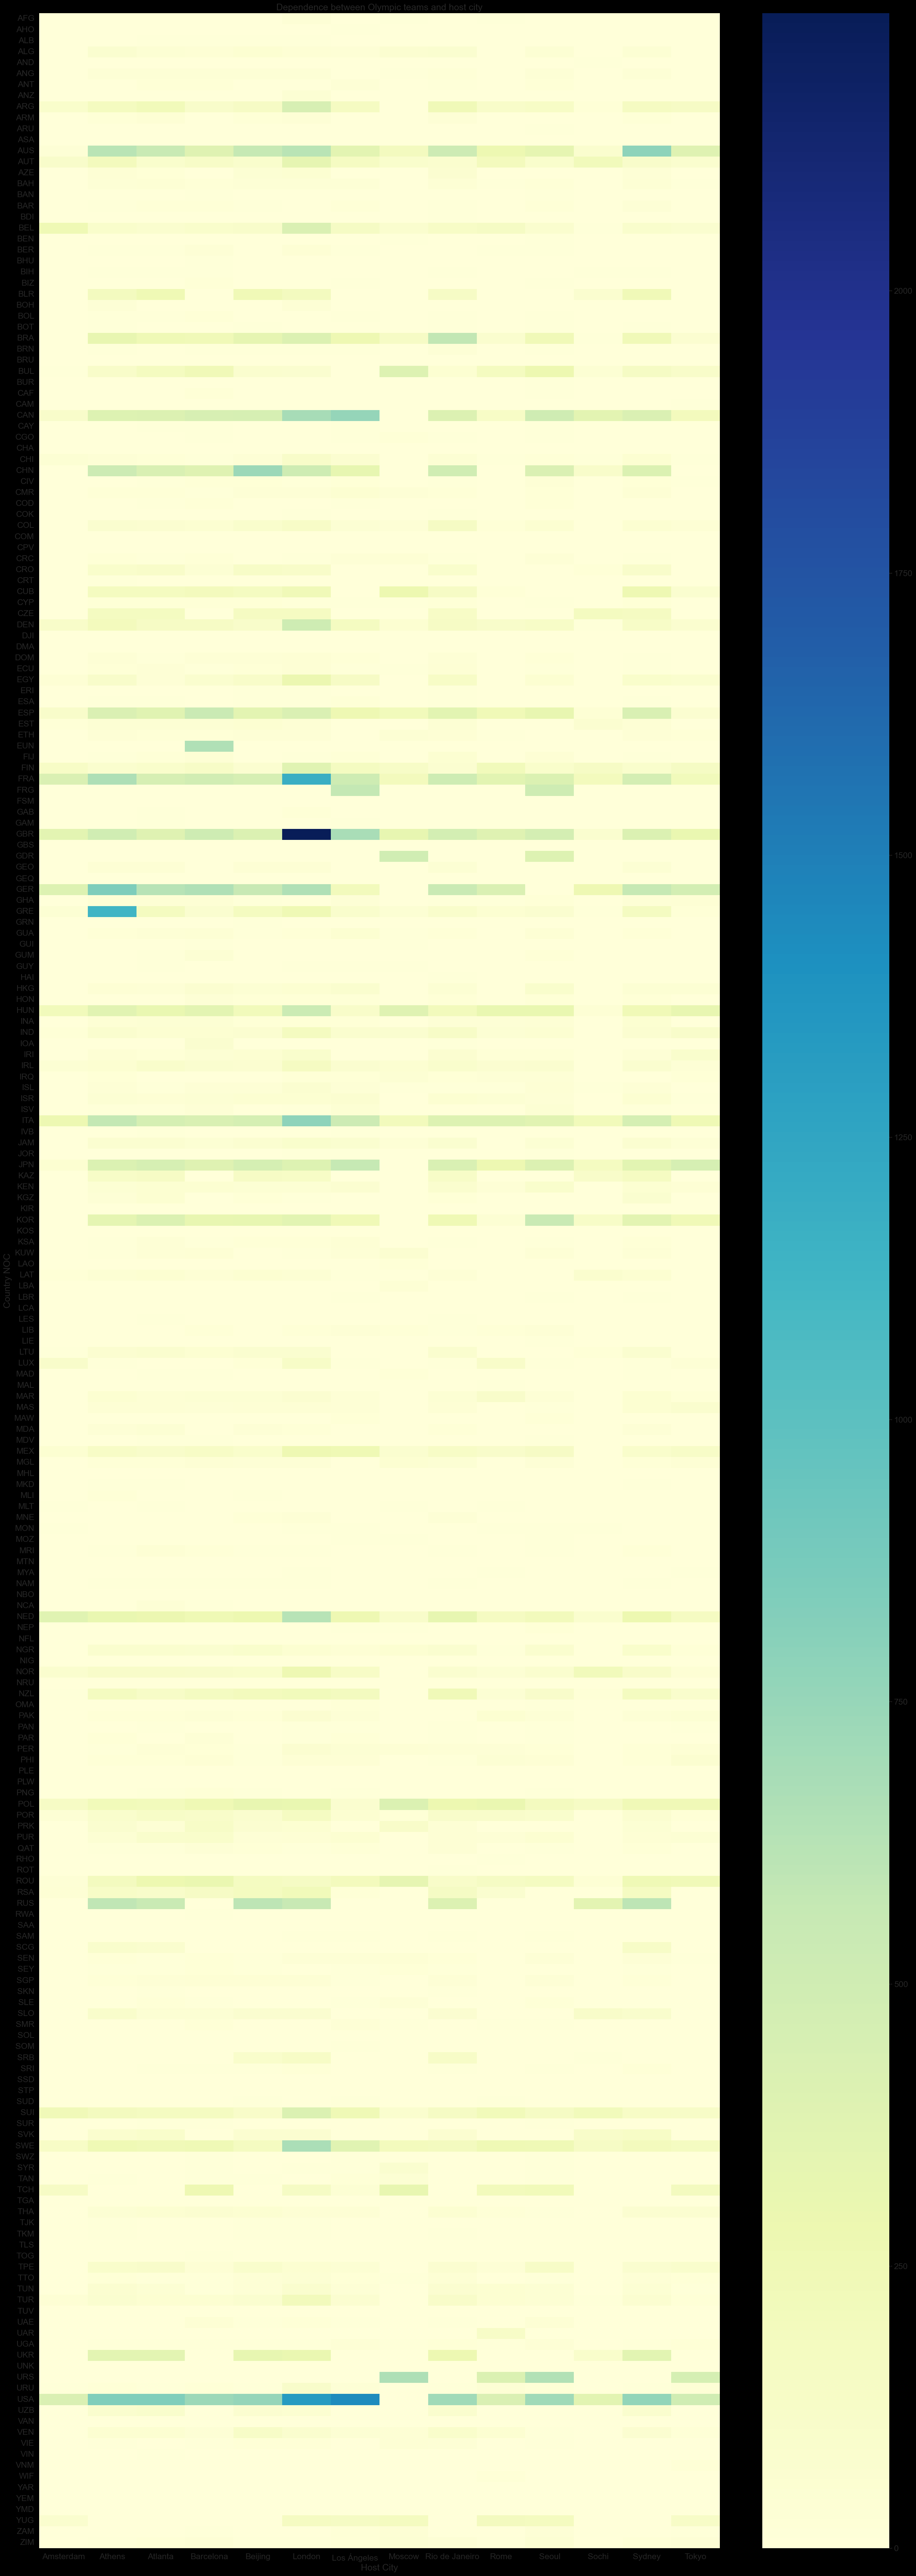

In [20]:
# building a heatmap

plt.figure(figsize=(30, 90))
sns.set(font_scale = 1.5)

sns.heatmap(
    heat_country_city_dependence, 
    annot=False, 
    cmap="YlGnBu", 
    fmt='g'
)

plt.title('Dependence between Olympic teams and host city')
plt.ylabel('Country NOC')
plt.xlabel('Host City')
plt.show()

Although, the strong National Olympic Committees like North American, Australian, European, Russian and so on, are taking medals pretty stable in different cities, looking the heatmap, we can admit that host city affects the medal count. 
    
- National teams have greater results at their home arenas (Exp: GBR - London, USA - Los Angeles, GRE - Athens, AUS - Sydney, CHN - Beijing) and at arenas which is close to their home location (Exp: USA - London, FRA - London, CAN - Los Angeles, CHN - Sydney). 
The largest number of fans are obviously at host city and city they can easier to get to. So the fans support is crucial. 
- Another crucial factor is preparation and training.
Athletes have bigger chances to win if their training before Olympiad will be in the same arena and even the same sports equipment. Changing location requires additional adoption.

#### 5. Is there a relationship between physical data (height/weight) of athletes and 	the 	number of wins in particular discipline?


In [21]:
# creating dataframe with specific columns with cleaned empty values and cases without medal.

height_weight_df = athlete_events[athlete_events['Medal'] != 'Choco'][['ID', 'Height', 'Weight', 'Sport', 'Medal']].\
    dropna(subset=['Height', 'Weight'])

height_weight_df.head()

,ID,Height,Weight,Sport,Medal
40,16,184.0,85.0,Ice Hockey,Bronze
41,17,175.0,64.0,Gymnastics,Bronze
42,17,175.0,64.0,Gymnastics,Gold
44,17,175.0,64.0,Gymnastics,Gold
48,17,175.0,64.0,Gymnastics,Gold


In [22]:
#Group athletes by height: >180 tall, <166 short; weight: >80 heavy, <65 light

#function for height
def height_checker(x):
    if x < 166:
        return 'short'
    elif 180 > x >= 166:
        return 'medium height'
    else:
        return 'tall'

#function for weight
def weight_checker(x):
    if x < 60:
        return 'light'
    elif 80 > x >= 60:
        return 'medium weight'
    else:
        return 'heavy'

height_weight_df['Height Group'] = height_weight_df['Height'].apply(height_checker)
height_weight_df['Weight Group'] = height_weight_df['Weight'].apply(weight_checker)

height_weight_df['Height/Weight Group'] = height_weight_df['Height Group'] + "/" + \
    height_weight_df['Weight Group']

In [23]:
height_weight_pivot_prep = height_weight_df.groupby(['Height/Weight Group', 'Sport'])\
    ['Medal'].count().reset_index()
height_weight_pivot_prep.head()

,Height/Weight Group,Sport,Medal
0,medium height/heavy,Alpine Skiing,32
1,medium height/heavy,Archery,12
2,medium height/heavy,Athletics,101
3,medium height/heavy,Badminton,2
4,medium height/heavy,Baseball,46


In [24]:
height_weight_pivot = height_weight_pivot_prep.pivot(
    index='Height/Weight Group', 
    columns='Sport', 
    values='Medal'
)

In [25]:
height_weight_pivot.fillna(0, inplace=True)

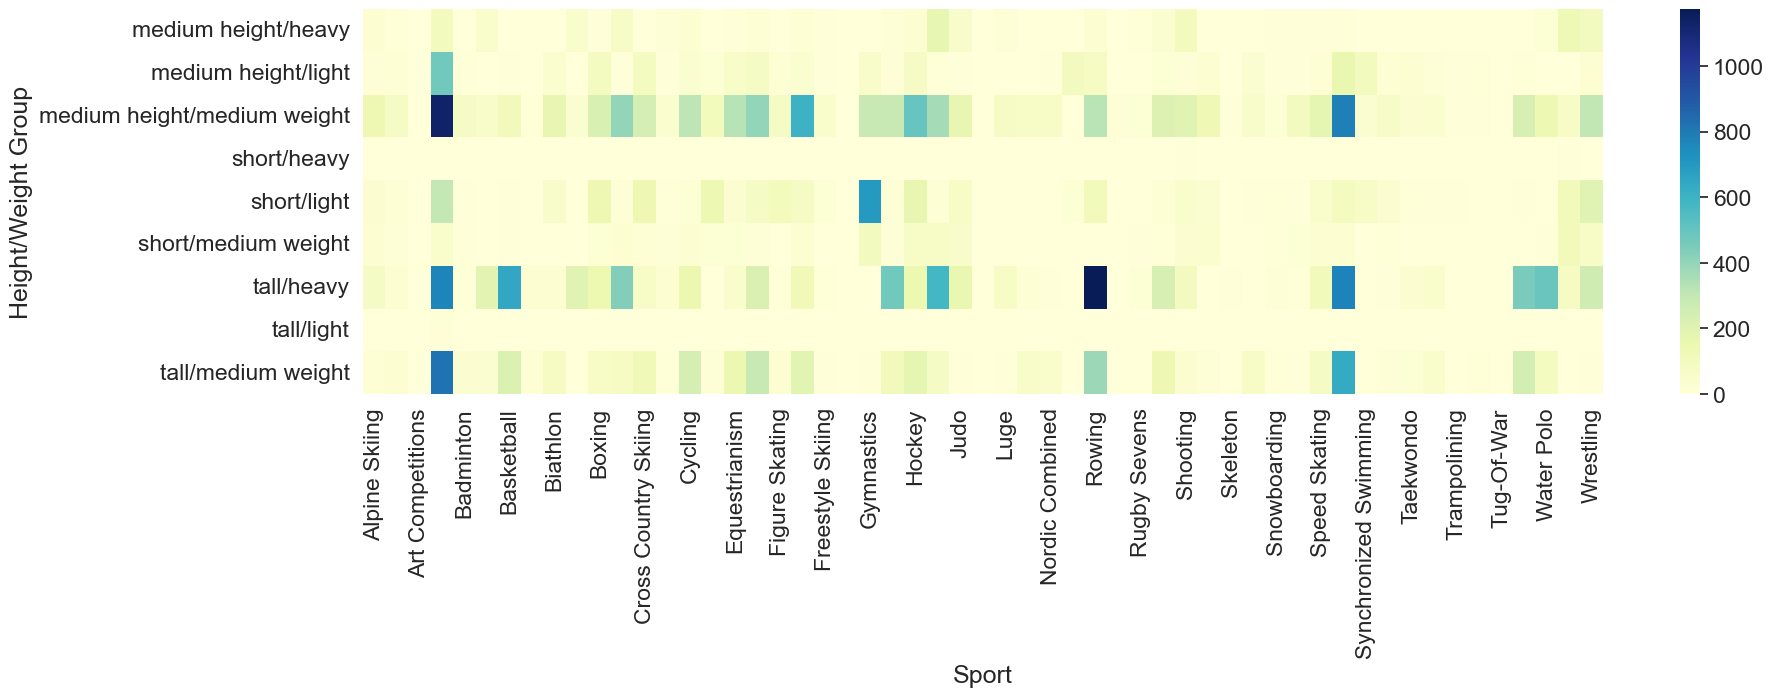

In [26]:
plt.figure(figsize=(20,5))
sns.heatmap(height_weight_pivot, 
            annot=False, 
            cmap="YlGnBu", 
            fmt='g')
sns.set(font_scale= 2)
plt.ylabel('Height/Weight Group')
plt.xlabel('Sport')
plt.show()

There are interesting patterns:
- Medium height/medium weight and the tall/heavy athletes most often win medals. While the athletes with varying height/weight parameters (like: tall/light, short/heavy, medium height/heavy) win the fewest medals.
It's crucial for athletes to abide by body mass index.

- Tall athletes which are heavy, more likely win in contact sports like Basketball, Handball, Ice Hockey, Water Polo, as well as sports where strong hands and legs give an advantage like Swimming, Rowing, Athletics, Canoeing. 

- Height can significantly influence success in sports, due to greater: strength, work capacity, reach, visibility, catching and so on.



### 6. Who is the most motivated athlete?

In [27]:
# to do that I need to get all performances for each athlete and count them till Gold medal will be reached

#performances df
athlete_performances = athlete_events[['ID', 'Year', 'Medal']]

#athletes IDs list df
athlete_ids = pd.DataFrame({'id': athlete_performances['ID'].unique()})

# performance calculation func
def performances_before_gold(athlete_id: str) -> int:
    performances = athlete_performances[athlete_performances['ID'] == athlete_id].sort_values(by='Year')
    result = performances.loc[:(performances['Medal'] == 'Gold').idxmax()]
    return result['Medal'].count() - 1 # substract 1, because last value is 'Gold'


athlete_ids['performances_count'] = athlete_ids['id'].apply(performances_before_gold)

In [29]:
athlete_ids.sort_values(by='performances_count', ascending=False).head()

,id,performances_count
106295,106296,25
45218,45219,25
13707,13708,19
63086,63087,19
129195,129196,19


In [30]:
print(
    athlete_events.set_index('ID').loc[[106296, 45219], 'Name'].unique()
)

['Heikki Ilmari Savolainen' 'Fabian Hambchen']


##### Heikki Ilmari Savolainen and Fabian Hambchen are the most motivated Olympians which performed on 25 games before taking their Gold trophy!

#### 7. How does average age of athletes change during the time?

<AxesSubplot: xlabel='Age', ylabel='ID'>

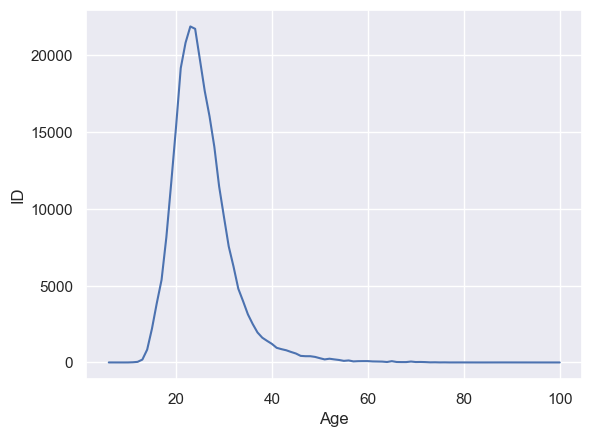

In [3]:
# checking the values distribution.

sns.set(font_scale = 1)
sns.lineplot(
    x='Age', 
    y='ID', 
    data=pd.DataFrame(athlete_events.groupby(athlete_events['Age'])['ID'].count())
)

In [ ]:
# Athletes age by year distribution

plt.figure(figsize=(20,10))

sns.boxplot(
    data=athlete_events[(athlete_events['Age'] >= 10) & (athlete_events['Age'] <= 72)].dropna(), 
    y='Age', 
    x='Year'
)

plt.show()